# Project: Investigate a Dataset - FBI GUN DATA

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The data comes from the FBI's National Instant Criminal Background Check System(NICS). The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. 


Based on documentation gotten from an FBI publication, each column represents the type of transaction submitted to the National Instant Criminal Background Check System (NICS). In addition, each type of transaction is broken down by the type of firearm—handgun, long gun, and other. The types of firearms are defined by the Bureau of Alcohol, Tobacco, Firearms and Explosives as follows:

* Month - This is the month the check was made

* State - This column indicates the State the check was initiated.

* permit - Number of permits issued.

* permit_recheck - Number of rechecks made on permits.

* Handgun - Number of firearms categorized as handguns

* Long Gun - Number of firearms categorized as Long guns(Rifles)

* Other - Number of other types of firearms

* Multiple - denotes a background check where more than one type of firearm is associated to a single background check

* Admin - denotes the administrative checks that are for other authorized uses of the NICS.

* Pre-Pawn—background - indicates checks requested by an officially-licensed FFL on prospective firearm transferees seeking to pledge or pawn a firearm as security for the payment or repayment of money, prior to actually pledging or pawning the firearm.

* Redemption—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to regain possession of a firearm after pledging or pawning a firearm as security at a pawn shop.

* Returned/Disposition—background checks requested by criminal justice/law enforcement agencies prior to returning a firearm in its possession to the respective transferee, to ensure the individual is not prohibited.

* Rentals—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm when the firearm is loaned or rented for use off the premises of the business.

* Private Sale—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.

* Return to Seller-Private Sale—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.

* Totals - Total number of firearms for each month per state.

Note: In general there are 3 classes of firearms recognized in this dataset namely; handguns, longuns, and others, hence, columns like "private_sale_long_gun" simply refer to a combination of the description for "private_sale" and "long_gun".

### Question(s) for Analysis
1. Which states have the most and least background checks for different firearm categories?
2. Which states have the most and least private sales for the different firearm categories?

In [27]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
import warnings
%matplotlib inline
#pd.options.display.max_rows = 9999
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")
print("Set-up complete")

Set-up complete


In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 4.3MB/s eta 0:00:01   47% |███████████████                 | 4.9MB 33.9MB/s eta 0:00:01    94% |██████████████████████████████▍ | 9.9MB 33.8MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 3.1MB/s eta 0:00:01   22% |███████▎                        | 3.1MB 33.9MB/s eta 0:00:01    58% |██████████████████▋             | 7.8MB 30.7MB/s eta 0:00:01    69% |██████████████████████▎         | 9.3MB 28.5MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [75]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_excel("Database_Ncis_and_Census_data/gun_data.xlsx")
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [76]:
df.shape

(12485, 27)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

The dataset as seen from the operations above contain 12485 entries with 27 columns, it's quite large as was to be expected since it was collected by aggregations by month and states. However, there are slight sssues with the structure of the data as some values are missing, also others might as well be dropped due to redundancies.


### Data Cleaning


Firstly, let's ensure all columns are having the right data types,(checks 3 cells up), fine. Next it's important to get rid of duplicates on entries and columns. So to check...

In [78]:
# check for duplicates
df.duplicated().sum()

0

In [79]:
# Transpose to check for duplicated columns.
df.T.duplicated()

month                        False
state                        False
permit                       False
permit_recheck               False
handgun                      False
long_gun                     False
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                       False
dtype: bool

Well, that came good meaning no duplicates either way, next we focus on nulls/missing entries.

In [80]:
# check for nulls.
df.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

Wow, that's an impressive amount of misising values in some of those columns, lets check the proportion of missing data by column.

In [81]:
# check for nulls proportion in columns.
null_sum = (df.isnull().sum())
round(null_sum/df.shape[0], 2)

month                        0.00
state                        0.00
permit                       0.00
permit_recheck               0.91
handgun                      0.00
long_gun                     0.00
other                        0.56
multiple                     0.00
admin                        0.00
prepawn_handgun              0.16
prepawn_long_gun             0.16
prepawn_other                0.59
redemption_handgun           0.16
redemption_long_gun          0.16
redemption_other             0.59
returned_handgun             0.82
returned_long_gun            0.83
returned_other               0.85
rentals_handgun              0.92
rentals_long_gun             0.93
private_sale_handgun         0.78
private_sale_long_gun        0.78
private_sale_other           0.78
return_to_seller_handgun     0.80
return_to_seller_long_gun    0.78
return_to_seller_other       0.82
totals                       0.00
dtype: float64

As shown above, there is a need to drop some columns as they do not have sufficient data, so let's set a threshhold, say a column should hold at least 70% of data to be accepted.

In [82]:
# selecting useable columns.
useable_cols = []
for col in df.columns:
    if df[col].isnull().sum()/df.shape[0] < 0.70:
        useable_cols.append(col)
print(len(useable_cols))
useable_cols

15


['month',
 'state',
 'permit',
 'handgun',
 'long_gun',
 'other',
 'multiple',
 'admin',
 'prepawn_handgun',
 'prepawn_long_gun',
 'prepawn_other',
 'redemption_handgun',
 'redemption_long_gun',
 'redemption_other',
 'totals']

From what we've seen above, only 15 of the original 27 had records with actual entries over or equal to 70%. One important facet though is to check the reason for the missing data in the other columns.

In [83]:
# check tail of entries with majority nulls.
df.drop(columns=useable_cols[2:]).tail()

,month,state,permit_recheck,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other
12480,1998-11,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12481,1998-11,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12482,1998-11,West Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12483,1998-11,Wisconsin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12484,1998-11,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# check top of entries with majority nulls.
df.drop(columns=useable_cols[2:]).head()

,month,state,permit_recheck,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other
0,2017-09,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0
1,2017-09,Alaska,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0
2,2017-09,Arizona,382.0,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0
3,2017-09,Arkansas,632.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0
4,2017-09,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Tentatively, at least, it would seem as though we're dealing with two datasets here from different time periods, let's investigate further and see if we can split them appropriately.

In [85]:
df[df["permit_recheck"].isnull()]

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
1100,2016-01,Alabama,27242.0,NaN,25445.0,14785.0,1266.0,884,0.0,8.0,...,0.0,NaN,NaN,16.0,15.0,2.0,0.0,1.0,0.0,73218
1101,2016-01,Alaska,192.0,NaN,2859.0,2245.0,300.0,164,0.0,5.0,...,0.0,NaN,NaN,2.0,0.0,0.0,0.0,1.0,0.0,6085
1102,2016-01,Arizona,3898.0,NaN,15745.0,8512.0,1107.0,575,0.0,7.0,...,0.0,NaN,NaN,10.0,9.0,2.0,4.0,2.0,0.0,31910
1103,2016-01,Arkansas,3670.0,NaN,7954.0,5982.0,305.0,340,0.0,11.0,...,0.0,NaN,NaN,3.0,6.0,1.0,1.0,0.0,0.0,20437
1104,2016-01,California,127715.0,NaN,52139.0,32970.0,7054.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,220912
1105,2016-01,Colorado,8431.0,NaN,23518.0,13327.0,1474.0,1236,0.0,0.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,48214
1106,2016-01,Connecticut,14005.0,NaN,13096.0,4366.0,236.0,0,9.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,31712
1107,2016-01,Delaware,395.0,NaN,2548.0,1608.0,110.0,73,0.0,5.0,...,0.0,NaN,NaN,89.0,23.0,5.0,3.0,1.0,0.0,4886
1108,2016-01,District of Columbia,27.0,NaN,52.0,3.0,0.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,82
1109,2016-01,Florida,28458.0,NaN,62085.0,26356.0,3480.0,2036,36.0,13.0,...,0.0,NaN,NaN,42.0,15.0,0.0,0.0,0.0,0.0,125935


As seen above, the cases of missing data are more prominent in earlier years. As a result of this, it would probably be a good idea to group by states then months for further comparisons.   

In [86]:
df.groupby(["state", "month"]).count().loc["Wyoming"]

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
month,,,,,,,,,,,,,,,,,,,,,
1998-11,1,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1998-12,1,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1999-01,1,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1999-02,1,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1999-03,1,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1999-04,1,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1999-05,1,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1999-06,1,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1999-07,1,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


From the above, it would seem as though the earlier assumptions of data getting larger over time were accurate. Let's split, then compare.

In [87]:
# Get index to use for slicing
df[df["month"] == "2016-01"].index

Int64Index([1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110,
            1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121,
            1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132,
            1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143,
            1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154],
           dtype='int64')

In [88]:
df_older = df.iloc[1100:]

In [89]:
df_newer = df.iloc[:1100]

In [90]:
df_newer.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
1095,2016-02,Virginia,784.0,0.0,30085.0,15948.0,1133.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,47955
1096,2016-02,Washington,15736.0,0.0,20583.0,11991.0,1832.0,863,1.0,3.0,...,3.0,NaN,NaN,578.0,422.0,30.0,5.0,15.0,0.0,56043
1097,2016-02,West Virginia,3527.0,0.0,10746.0,7436.0,357.0,757,5.0,6.0,...,3.0,NaN,NaN,11.0,5.0,1.0,3.0,2.0,0.0,27216
1098,2016-02,Wisconsin,9420.0,0.0,19465.0,12431.0,821.0,62,0.0,0.0,...,2.0,NaN,NaN,5.0,15.0,0.0,0.0,0.0,0.0,42855
1099,2016-02,Wyoming,551.0,0.0,2287.0,2036.0,139.0,150,0.0,3.0,...,0.0,NaN,NaN,0.0,4.0,0.0,1.0,1.0,0.0,5703


The data has been split into two tentatively, however, there seems to still be more work to be done.

In [91]:
df_newer.isnull().sum()/df_newer.shape[0]

month                        0.0
state                        0.0
permit                       0.0
permit_recheck               0.0
handgun                      0.0
long_gun                     0.0
other                        0.0
multiple                     0.0
admin                        0.0
prepawn_handgun              0.0
prepawn_long_gun             0.0
prepawn_other                0.0
redemption_handgun           0.0
redemption_long_gun          0.0
redemption_other             0.0
returned_handgun             0.0
returned_long_gun            0.0
returned_other               0.0
rentals_handgun              0.3
rentals_long_gun             0.3
private_sale_handgun         0.0
private_sale_long_gun        0.0
private_sale_other           0.0
return_to_seller_handgun     0.0
return_to_seller_long_gun    0.0
return_to_seller_other       0.0
totals                       0.0
dtype: float64

Wow! the df_newer dataset is definitely clean, and the inconsistencies negligible as set by our threshold of 70%. Let's fill the missing values with 0(since it's security related assumptions have dire consequencies) and move unto df_older:

In [92]:
df_newer[df_newer["rentals_handgun"].isnull()]

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
770,2016-07,Alabama,27765.0,0.0,10132.0,7392.0,538.0,465,0.0,5.0,...,0.0,NaN,NaN,9.0,5.0,0.0,1.0,1.0,0.0,48927
771,2016-07,Alaska,215.0,0.0,2898.0,2816.0,239.0,165,0.0,7.0,...,0.0,NaN,NaN,7.0,17.0,0.0,1.0,0.0,0.0,6793
772,2016-07,Arizona,7863.0,308.0,13693.0,8643.0,1283.0,642,0.0,5.0,...,0.0,NaN,NaN,13.0,9.0,0.0,0.0,1.0,0.0,34496
773,2016-07,Arkansas,4116.0,677.0,6323.0,5053.0,325.0,367,2.0,6.0,...,0.0,NaN,NaN,7.0,5.0,1.0,0.0,1.0,0.0,19378
774,2016-07,California,77962.0,0.0,46361.0,47594.0,17297.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,190218
775,2016-07,Colorado,6372.0,0.0,18765.0,15176.0,1505.0,1054,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,43094
776,2016-07,Connecticut,14156.0,0.0,11328.0,4015.0,252.0,0,4.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,29755
777,2016-07,Delaware,755.0,0.0,1859.0,1569.0,140.0,74,0.0,0.0,...,0.0,NaN,NaN,45.0,22.0,5.0,1.0,0.0,0.0,4494
778,2016-07,District of Columbia,0.0,0.0,57.0,1.0,0.0,2,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,60
779,2016-07,Florida,28106.0,0.0,57902.0,28000.0,4504.0,2324,12.0,8.0,...,1.0,NaN,NaN,39.0,12.0,1.0,0.0,0.0,0.0,125208


In [93]:
df_newer.fillna(0, inplace=True)

In [94]:
df_newer.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

In [95]:
# Get list of columns with at least 30% nulls
dropped_cols = []
for col in df_older.columns:
    if (df_older[col].isnull().sum()/df_older.shape[0]) > 0.30:
        dropped_cols.append(col)
# Keep "other" category of firearms
dropped_cols.pop(1)

'other'

In [96]:
df_older.drop(columns=dropped_cols).isnull().sum()/df_older.shape[0]

month                  0.000000
state                  0.000000
permit                 0.002108
handgun                0.001757
long_gun               0.001669
other                  0.613527
multiple               0.000000
admin                  0.002020
prepawn_handgun        0.170663
prepawn_long_gun       0.170839
redemption_handgun     0.170400
redemption_long_gun    0.170487
totals                 0.000000
dtype: float64

In [97]:
df_older.drop(columns=dropped_cols, inplace=True)
df_older.fillna(0, inplace=True)

The older dataset thus seems manageable.

In [98]:
df_older.isnull().sum()

month                  0
state                  0
permit                 0
handgun                0
long_gun               0
other                  0
multiple               0
admin                  0
prepawn_handgun        0
prepawn_long_gun       0
redemption_handgun     0
redemption_long_gun    0
totals                 0
dtype: int64

Finally, let's check the consistency of our datasets.

In [99]:
df_newer.shape[0] + df_older.shape[0] == df.shape[0]

True

To recap, the original dataset was found to contain too many null values, hence, it was seperated by a specific timeline and cleaned to get two better(in my opinion) subsets.

<a id='eda'></a>
## Exploratory Data Analysis



###  Which states have the most and least background checks for different firearm categories?

In [100]:
firearm_cat = ["handgun", "long_gun", "other", "totals"]

In [101]:
# Groupby states and aggregate by totals.
state_firearms_old = df_older.groupby("state").sum()
state_firearms_new = df_newer.groupby("state").sum()

In [102]:
state_firearms_old.shape

(55, 11)

In [103]:
# Combine the two datasets based on fire arm categories and totals.
state_firearms = state_firearms_new.copy()
for col in state_firearms[firearm_cat]:
    state_firearms[col] += state_firearms_old[col]
state_firearms[firearm_cat].shape

(55, 4)

In [104]:
state_firearms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Alabama to Wyoming
Data columns (total 25 columns):
permit                       55 non-null float64
permit_recheck               55 non-null float64
handgun                      55 non-null float64
long_gun                     55 non-null float64
other                        55 non-null float64
multiple                     55 non-null int64
admin                        55 non-null float64
prepawn_handgun              55 non-null float64
prepawn_long_gun             55 non-null float64
prepawn_other                55 non-null float64
redemption_handgun           55 non-null float64
redemption_long_gun          55 non-null float64
redemption_other             55 non-null float64
returned_handgun             55 non-null float64
returned_long_gun            55 non-null float64
returned_other               55 non-null float64
rentals_handgun              55 non-null float64
rentals_long_gun             55 non-null float64
private_sal

In [105]:
# Get total firearm checks.
total_arms = state_firearms["totals"].sort_values()
total_arms.head()

state
Mariana Islands            462
District of Columbia      5601
Guam                     14997
Virgin Islands           15108
Puerto Rico             194464
Name: totals, dtype: int64

In [106]:
# Get top 5 lowest and highest totals.
lowest_arms = total_arms.head(6)
print(lowest_arms)
highest_arms = total_arms.tail(6)
highest_arms

state
Mariana Islands            462
District of Columbia      5601
Guam                     14997
Virgin Islands           15108
Puerto Rico             194464
Hawaii                  197580
Name: totals, dtype: int64


state
Florida         11695777
Pennsylvania    13133876
Illinois        15471534
California      19014063
Texas           19435186
Kentucky        29762434
Name: totals, dtype: int64

Hawai and Puerto Rico being so close means there is a need to extend to top 6 rather than 5.

In [107]:
# Create a function for a comparative visualizaton.
def bar_chart(df, y_scale=1e03, y_scale_two=1e06):
    df_one = df.sort_values().head(6)
    df_two = df.sort_values().tail(6)
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (15,12))
    
    # Plot the bar plot ;).
    # axis 0
    sns.barplot(x=df_one.index, y=df_one/y_scale, ax=ax[0])
    ax[0].set_xlabel("States", fontsize=15)
    ax[0].set_ylabel("Total Firearms (thousands)", fontsize=15)
    ax[0].set_title("lowest", fontsize=15)
    #ax[0].bar_label(df_one)
    # axis 1
    sns.barplot(x=df_two.index, y=df_two/y_scale_two, ax=ax[1])
    ax[1].set_xlabel("States", fontsize=15)
    ax[1].set_ylabel("Total Firearms (millions)", fontsize=15)
    ax[1].set_title("Highest", fontsize=15);

    # Add a title to the Figure}
    fig.suptitle(f"Top {len(df_one)} States {df_one.name} Firearms checks.", fontsize=25);

    # Show the figure
    fig.show()

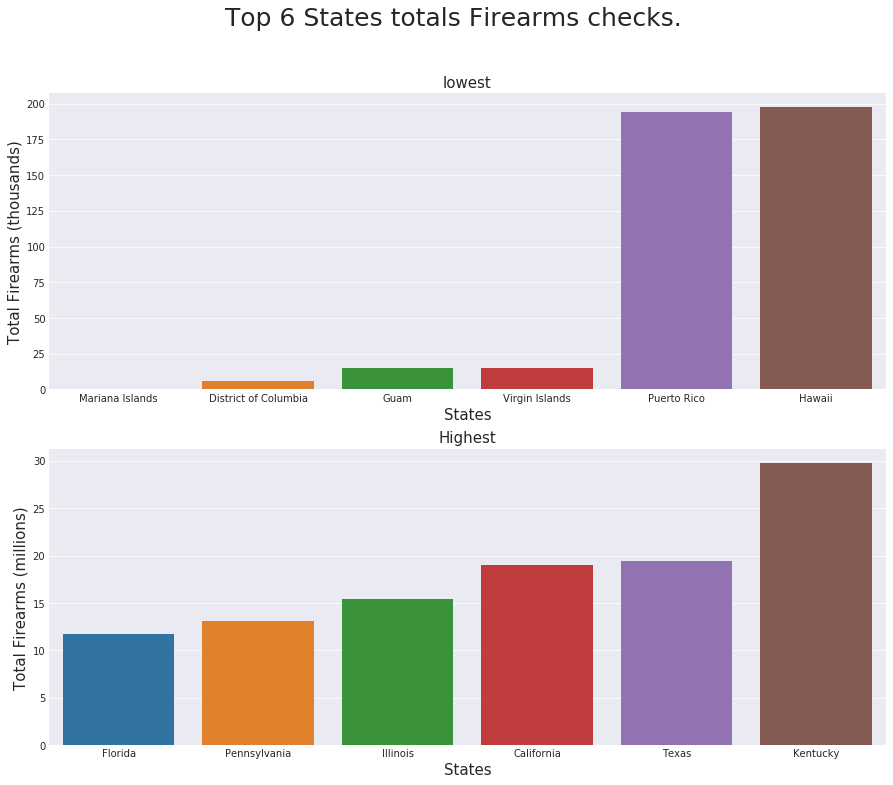

In [50]:
bar_chart(state_firearms["totals"])

From what we've seen thus far, Kentucky is by a large distance the state with the most background check, while Mariana islands account for a measly(< 1000) number. So, what does this mean? or what inferences can we draw from this?, None in a nutshell, as there is a need for additional information in order to make generalizations about this result. This might include details like census data, crime rate statistics, or even political affiliations/leanings. That being said, let's check the top states by firearm types.

In [41]:
# Group states by handguns.
handgun = state_firearms["handgun"].sort_values()
handgun_low = handgun.head()
handgun_high = handgun.tail()
handgun_low

state
Hawaii                     3.0
Mariana Islands          249.0
Virgin Islands          3112.0
District of Columbia    4570.0
Guam                    7642.0
Name: handgun, dtype: float64

In [42]:
# Group states by longguns.
long_gun = state_firearms["long_gun"].sort_values()
long_gun_low = long_gun.head()
long_gun_high = long_gun.tail()
long_gun_low

state
Hawaii                    35.0
Mariana Islands          182.0
Virgin Islands           431.0
District of Columbia     605.0
Guam                    6035.0
Name: long_gun, dtype: float64

In [43]:
# Group states by other.
other = state_firearms["other"].sort_values()
other_low = other.head()
other_high = other.tail()
other_low

state
Oregon                  1.0
District of Columbia    1.0
Illinois                1.0
Hawaii                  2.0
Virgin Islands          5.0
Name: other, dtype: float64

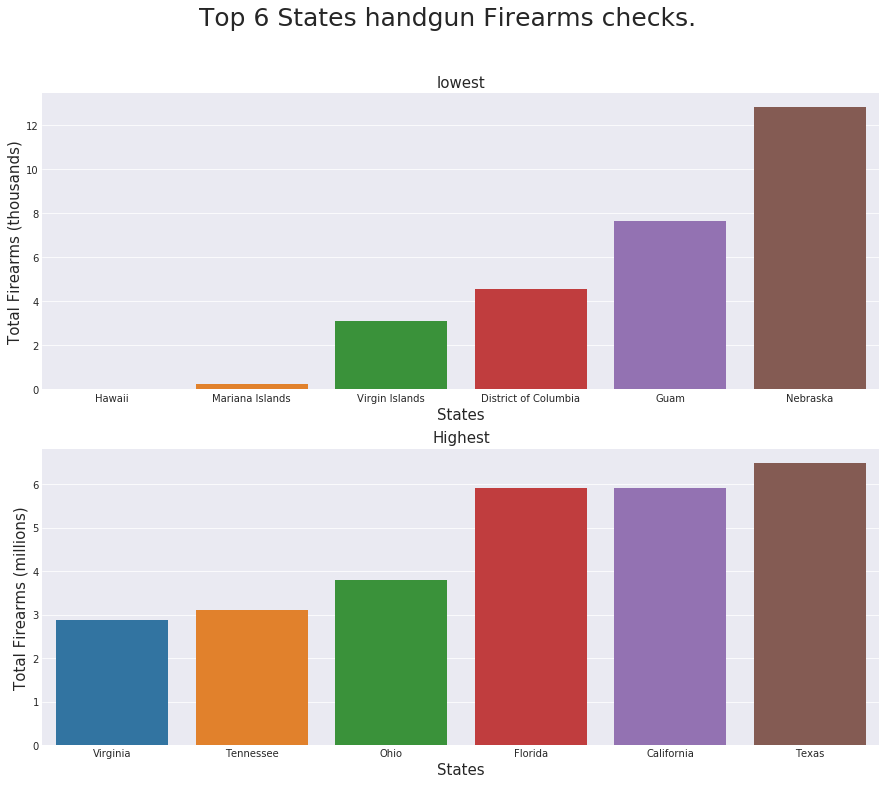

In [44]:
bar_chart(state_firearms["handgun"])

This is impressive. The mere fact that Kentucky is not listed amongst the top 6 for handguns is a major eye opener, and it's also noticeable that Mariana islands has a relatively sizable number of handguns when compared to say Hawai, despite being lowest in total background checks(intriguing, let's dive further.

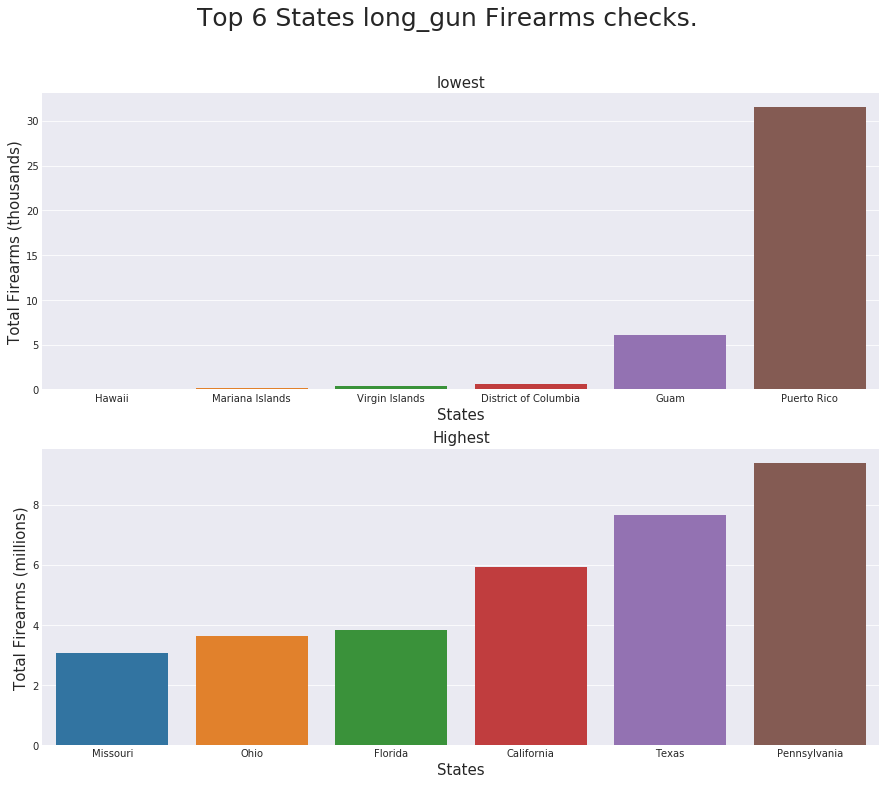

In [45]:
bar_chart(state_firearms["long_gun"])

Once again, Kentucky still isn't amongst the top 6, with Pennsylvania taking the price for this, It should be noted though that Texas has been consistently in the top 2 thus far for every category.

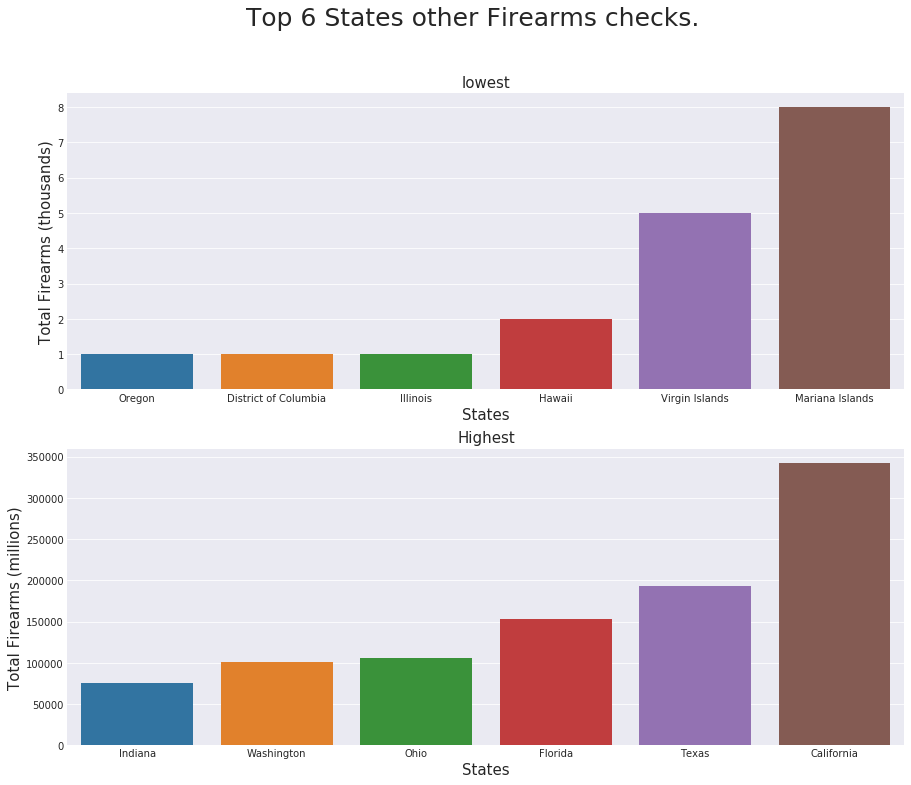

In [54]:
bar_chart(state_firearms["other"], y_scale=1, y_scale_two=1)

Thus we have accessories or firearms categorized as other most prevalent in California, followed by, you guessed right, Texas. It should also be noted that both Hawai and Mariana islands showed quite a considerable increase for this class of firearms, could there be more stringent conditions for acquiring the former classes of weapons in these states? remember, the golden rule(by me), no assumptions except the data says so.

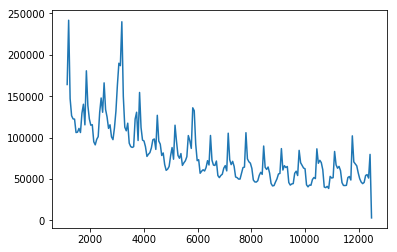

In [96]:
#df_older[df_older["state"] == "Texas"]["totals"].plot()

### Which states have the most and least private sales of the different firearm categories?

In [100]:
state_firearms.head()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,
Alabama,450952.0,749.0,2222037.0,2626029.0,39578.0,8621,5.0,186.0,213.0,9.0,...,0.0,0.0,0.0,170.0,144.0,11.0,5.0,6.0,6.0,6706079
Alaska,5069.0,22.0,434602.0,572174.0,15970.0,3760,0.0,115.0,99.0,0.0,...,10.0,0.0,0.0,184.0,236.0,10.0,3.0,5.0,1.0,1137643
Arizona,147410.0,6701.0,1781468.0,1480762.0,56832.0,13129,0.0,134.0,90.0,7.0,...,1.0,0.0,0.0,261.0,159.0,31.0,13.0,13.0,3.0,4425714
Arkansas,81433.0,13595.0,965584.0,1663256.0,13053.0,7214,518.0,147.0,193.0,4.0,...,0.0,0.0,0.0,171.0,182.0,13.0,9.0,12.0,4.0,3752633
California,1441076.0,0.0,5910880.0,5936770.0,342635.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19014063


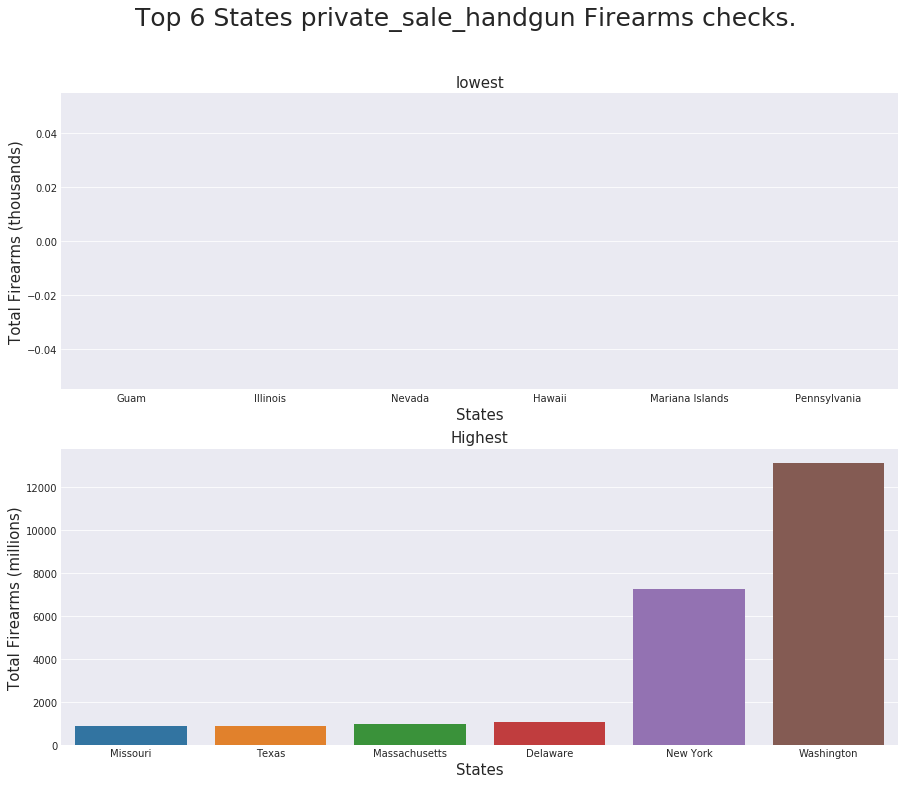

In [56]:
bar_chart(state_firearms["private_sale_handgun"], y_scale=10, y_scale_two=1)        

It would seem as though Washington D.C accounts for most private sales of hand guns folllowed by New york, the rest are not too significant.

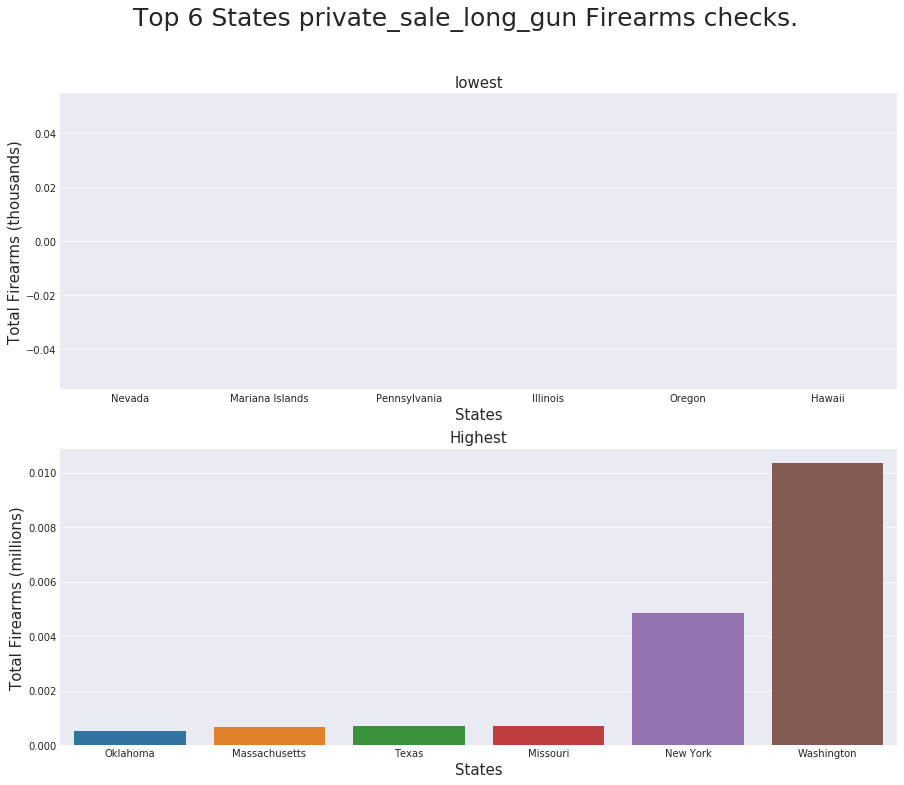

In [52]:
bar_chart(state_firearms["private_sale_long_gun"])

The same is also found for the long guns.

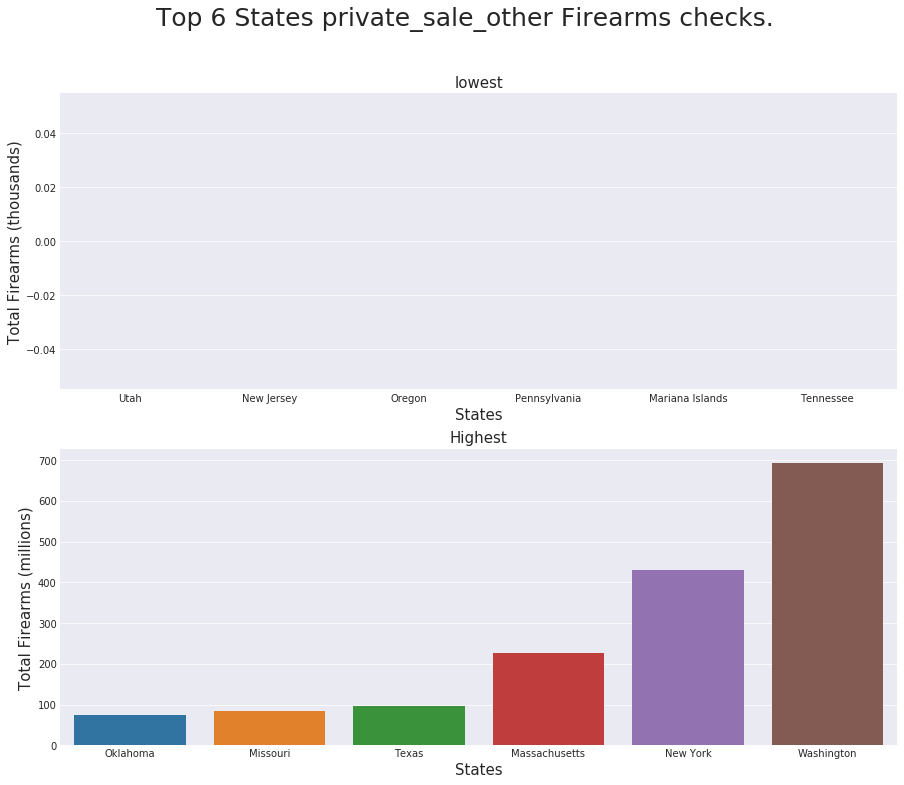

In [57]:
bar_chart(state_firearms["private_sale_other"], y_scale=1, y_scale_two=1)

And do you know it, same applies to "Other". Finaaly, let's try and investigate if there are any relationships between the demand of the various firearm types, as assumed by the checks carried out on them. First let's view the top and bottom 6 states with the highest "totals" with the firearm categories side by side.

In [118]:
# create a new column to hold the sum of all firearm categories, then check for highest total and lowest.
state_firearms["total_firearms"] = state_firearms["handgun"] + state_firearms["long_gun"] + state_firearms["other"]
all_firearms = state_firearms[["handgun", "long_gun", "other", "total_firearms"]].sort_values(by="total_firearms")
high_firearms = all_firearms.tail()
low_firearms = all_firearms.head()

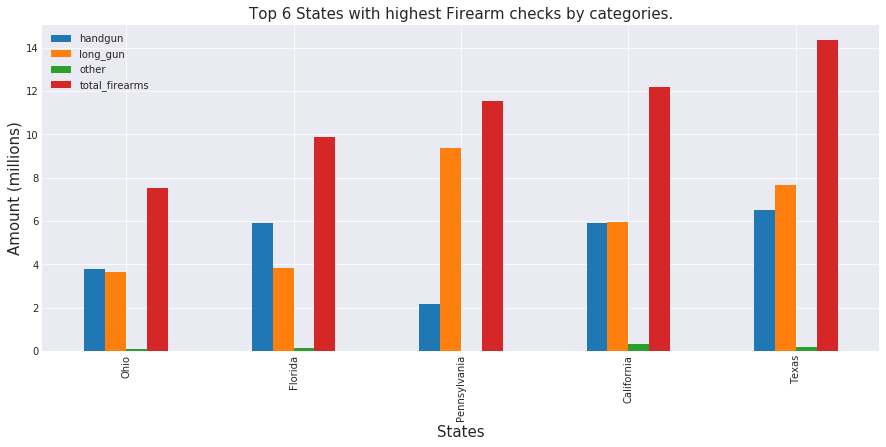

In [119]:
# create a clustered bar plot to show the firearm numbers by categories.
(high_firearms/1e06).plot(kind="bar", figsize=(15, 6))
plt.title("Top 6 States with highest Firearm checks by categories.", fontsize=15)
plt.xlabel("States", fontsize=15)
plt.ylabel("Amount (millions)", fontsize=15);

Surely, there ARE some inconsistencies, especially since the sum of all three firearm categories do not seem to add up to the main "totals" column. Let's just file that under further investigations.

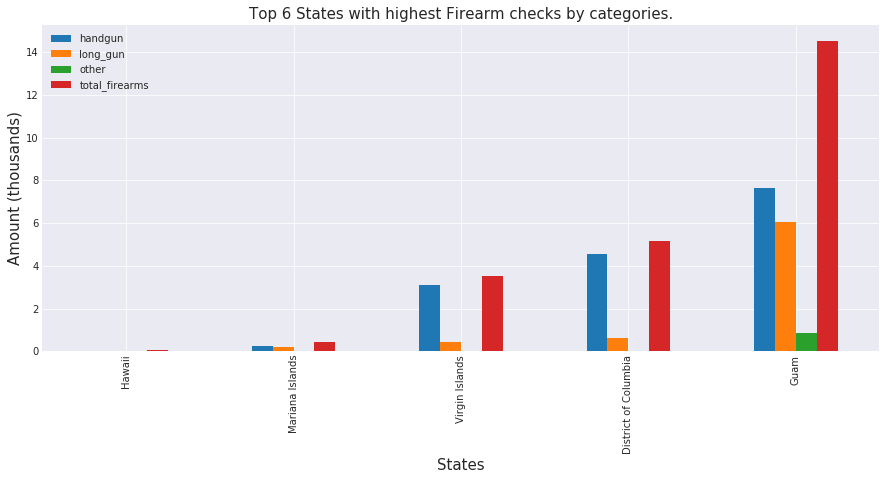

In [120]:
(low_firearms/1e03).plot(kind="bar", figsize=(15, 6))
plt.title("Top 6 States with highest Firearm checks by categories.", fontsize=15)
plt.xlabel("States", fontsize=15)
plt.ylabel("Amount (thousands)", fontsize=15);

Are there relationships between firearm categories and total firearms?(Not part of research questions, but...), Let's see;

In [125]:
state_firearms[firearm_cat].corr()

,handgun,long_gun,other,totals
handgun,1.000000,0.777428,0.833962,0.716187
long_gun,0.777428,1.000000,0.620138,0.720044
other,0.833962,0.620138,1.000000,0.567329
totals,0.716187,0.720044,0.567329,1.000000


Seems as though all weapon firearm category types have a positive relationship with total checks. In an unrelated check, unsuprisingly, hand guns and long guns have strong positive correlations with total checks. Let's do a regression(lm plot), just to be sure 

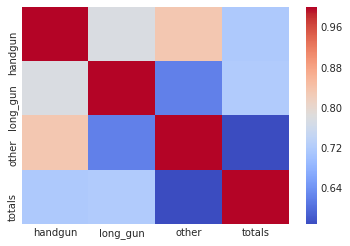

In [127]:
sns.heatmap(state_firearms[firearm_cat].corr(), cmap="coolwarm");

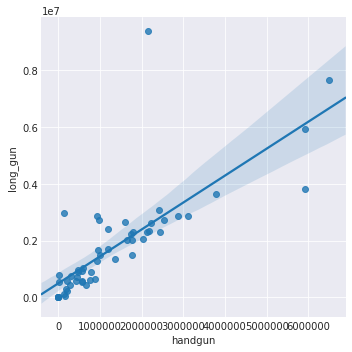

In [138]:
sns.lmplot(data=state_firearms, x="handgun", y="long_gun");

From the above, we can infer that a positive relationship exists between handguns and longguns. However, that wasn't our true goal so...

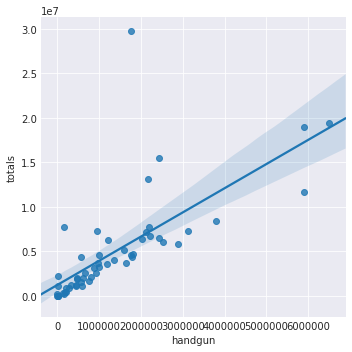

In [139]:
sns.lmplot(data=state_firearms, x="handgun", y="totals");

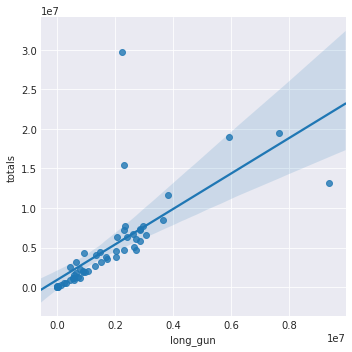

In [140]:
sns.lmplot(data=state_firearms, x="long_gun", y="totals");

The above, being just a formality confirmed the suspicions, there is a positive relationship between the weapon categories and total checks.

<a id='conclusions'></a>
## Conclusions
The dataset contained details about background checks carried out in the United States of America(USA) by the Federal Bureau of Intelligence(FBI) within a specified time period. It showed among other things the distribution of different categories of firearms by states and also the different timelines associated with them. Thus, insigghts were drawn from the dataset, which though fallible, were fascinating. It is my view that a more in depth approach achieved via supporting datasets will help in understanding and making inferences from this dataset.
## Submitting your Project 


In [141]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255